In [45]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import tensorflow as tf

In [46]:
#loading the dataset
df=pd.read_csv('../input/gas-prices-in-brazil/2004-2019.tsv',delimiter='\t')

In [47]:
#loading the dataset
df

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,...,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,...,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,...,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,...,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,...,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,...,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106818,106818,2019-06-23,2019-06-29,NORDESTE,RIO GRANDE DO NORTE,GNV,7,R$/m3,3.574,0.065,...,3.690,0.818,0.018,2.756,0,2.756,2.756,0,6,2019
106819,106819,2019-06-23,2019-06-29,SUL,RIO GRANDE DO SUL,GNV,23,R$/m3,3.401,0.129,...,3.789,0.95,0.038,2.451,0.402,1.9842,2.8661,0.164,6,2019
106820,106820,2019-06-23,2019-06-29,SUL,SANTA CATARINA,GNV,24,R$/m3,2.912,0.190,...,3.499,0.914,0.065,1.998,0,1.9981,1.9981,0,6,2019
106821,106821,2019-06-23,2019-06-29,SUDESTE,SAO PAULO,GNV,52,R$/m3,3.020,0.229,...,3.490,0.646,0.076,2.374,0.165,2.0179,2.5093,0.07,6,2019


In [48]:
#getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106823 entries, 0 to 106822
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     106823 non-null  int64  
 1   DATA INICIAL                   106823 non-null  object 
 2   DATA FINAL                     106823 non-null  object 
 3   REGIÃO                         106823 non-null  object 
 4   ESTADO                         106823 non-null  object 
 5   PRODUTO                        106823 non-null  object 
 6   NÚMERO DE POSTOS PESQUISADOS   106823 non-null  int64  
 7   UNIDADE DE MEDIDA              106823 non-null  object 
 8   PREÇO MÉDIO REVENDA            106823 non-null  float64
 9   DESVIO PADRÃO REVENDA          106823 non-null  float64
 10  PREÇO MÍNIMO REVENDA           106823 non-null  float64
 11  PREÇO MÁXIMO REVENDA           106823 non-null  float64
 12  MARGEM MÉDIA REVENDA          

In [49]:
#Prepreprocssing 
unneeded_columns=['Unnamed: 0','DATA INICIAL','DATA FINAL']
#dropping the unneeded column
df=df.drop(unneeded_columns,axis=1)

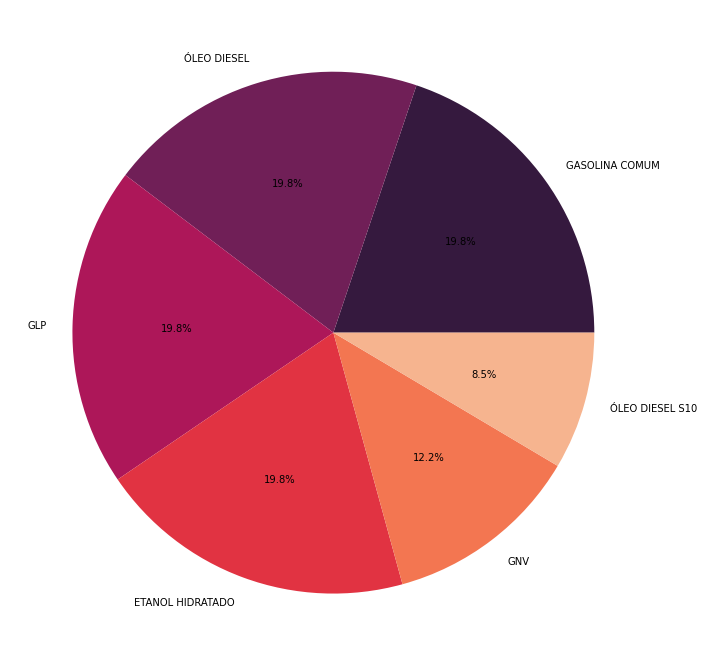

In [50]:
#ploting the dataset
plt.figure(figsize=(12,12))
plt.pie(x=df['PRODUTO'].value_counts(),
       labels=df['PRODUTO'].value_counts().index,
       autopct='%.1f%%',colors=sns.color_palette('rocket'))
plt.show()


In [51]:
df['PRODUTO'].value_counts()

GASOLINA COMUM      21194
ÓLEO DIESEL         21194
GLP                 21186
ETANOL HIDRATADO    21102
GNV                 13034
ÓLEO DIESEL S10      9113
Name: PRODUTO, dtype: int64

In [52]:
#Encoding 
label_encoder=LabelEncoder()
df['PRODUTO']=label_encoder.fit_transform(df['PRODUTO'])

In [53]:
#which df converted to which number
dict(enumerate(label_encoder.classes_))

{0: 'ETANOL HIDRATADO',
 1: 'GASOLINA COMUM',
 2: 'GLP',
 3: 'GNV',
 4: 'ÓLEO DIESEL',
 5: 'ÓLEO DIESEL S10'}

In [54]:
#getting column and its unique values in the form of list
{column:list(df[column].unique()) for column in df.columns if df.dtypes[column]=='object'}

{'REGIÃO': ['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'],
 'ESTADO': ['DISTRITO FEDERAL',
  'GOIAS',
  'MATO GROSSO',
  'MATO GROSSO DO SUL',
  'ALAGOAS',
  'BAHIA',
  'CEARA',
  'MARANHAO',
  'PARAIBA',
  'PERNAMBUCO',
  'PIAUI',
  'RIO GRANDE DO NORTE',
  'SERGIPE',
  'ACRE',
  'AMAPA',
  'AMAZONAS',
  'PARA',
  'RONDONIA',
  'RORAIMA',
  'TOCANTINS',
  'ESPIRITO SANTO',
  'MINAS GERAIS',
  'RIO DE JANEIRO',
  'SAO PAULO',
  'PARANA',
  'RIO GRANDE DO SUL',
  'SANTA CATARINA'],
 'UNIDADE DE MEDIDA': ['R$/l', 'R$/13Kg', 'R$/m3'],
 'MARGEM MÉDIA REVENDA': ['0.463',
  '0.399',
  '0.419',
  '0.432',
  '0.24',
  '0.426',
  '0.353',
  '0.515',
  '0.277',
  '0.494',
  '0.332',
  '0.321',
  '0.689',
  '0.412',
  '0.441',
  '0.536',
  '0.533',
  '0.202',
  '0.546',
  '0.267',
  '0.389',
  '0.312',
  '0.198',
  '0.255',
  '0.416',
  '0.448',
  '0.421',
  '0.401',
  '0.428',
  '0.257',
  '0.413',
  '0.347',
  '0.529',
  '0.367',
  '0.286',
  '0.489',
  '0.335',
  '0.311',
  '0.693',
 

In [55]:
#creating onehot encoder 
def onehot_encode(df,columns,prefixes):
    df=df.copy()
    for column,prefix in zip(columns,prefixes):
        dummies=pd.get_dummies(df[column],prefix=prefix)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    return df
        

In [56]:
#encoding categorical variables
df=onehot_encode(
    df,['REGIÃO','ESTADO','UNIDADE DE MEDIDA'],['R','E','U'])
    

In [57]:
df

,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,...,E_RIO GRANDE DO SUL,E_RONDONIA,E_RORAIMA,E_SANTA CATARINA,E_SAO PAULO,E_SERGIPE,E_TOCANTINS,U_R$/13Kg,U_R$/l,U_R$/m3
0,0,127,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.11,...,0,0,0,0,0,0,0,0,1,0
1,0,387,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,...,0,0,0,0,0,0,0,0,1,0
2,0,192,1.389,0.097,1.180,1.760,0.419,0.070,0.97,0.095,...,0,0,0,0,0,0,0,0,1,0
3,0,162,1.262,0.070,1.090,1.509,0.432,0.055,0.83,0.119,...,0,0,0,0,0,0,0,0,1,0
4,0,103,1.181,0.078,1.050,1.400,0.24,0.066,0.941,0.077,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106818,3,7,3.574,0.065,3.499,3.690,0.818,0.018,2.756,0,...,0,0,0,0,0,0,0,0,0,1
106819,3,23,3.401,0.129,3.230,3.789,0.95,0.038,2.451,0.402,...,1,0,0,0,0,0,0,0,0,1
106820,3,24,2.912,0.190,2.699,3.499,0.914,0.065,1.998,0,...,0,0,0,1,0,0,0,0,0,1
106821,3,52,3.020,0.229,2.699,3.490,0.646,0.076,2.374,0.165,...,0,0,0,0,1,0,0,0,0,1


In [58]:
#checking - with 
df.isin(['-']).sum()

PRODUTO                             0
NÚMERO DE POSTOS PESQUISADOS        0
PREÇO MÉDIO REVENDA                 0
DESVIO PADRÃO REVENDA               0
PREÇO MÍNIMO REVENDA                0
PREÇO MÁXIMO REVENDA                0
MARGEM MÉDIA REVENDA             3431
COEF DE VARIAÇÃO REVENDA            0
PREÇO MÉDIO DISTRIBUIÇÃO         3400
DESVIO PADRÃO DISTRIBUIÇÃO       3400
PREÇO MÍNIMO DISTRIBUIÇÃO        3400
PREÇO MÁXIMO DISTRIBUIÇÃO        3400
COEF DE VARIAÇÃO DISTRIBUIÇÃO    3400
MÊS                                 0
ANO                                 0
R_CENTRO OESTE                      0
R_NORDESTE                          0
R_NORTE                             0
R_SUDESTE                           0
R_SUL                               0
E_ACRE                              0
E_ALAGOAS                           0
E_AMAPA                             0
E_AMAZONAS                          0
E_BAHIA                             0
E_CEARA                             0
E_DISTRITO F

In [59]:
#replacing - with NaN and then missing NaN with mean of that column
df=df.replace('-',np.NaN)
for column in df.columns:
    df[column]=df[column].fillna(df[column].astype(np.float).mean())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [60]:
[column for column in df.columns if df.dtypes[column]=='object']

['MARGEM MÉDIA REVENDA',
 'PREÇO MÉDIO DISTRIBUIÇÃO',
 'DESVIO PADRÃO DISTRIBUIÇÃO',
 'PREÇO MÍNIMO DISTRIBUIÇÃO',
 'PREÇO MÁXIMO DISTRIBUIÇÃO',
 'COEF DE VARIAÇÃO DISTRIBUIÇÃO']

In [61]:
df

,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,...,E_RIO GRANDE DO SUL,E_RONDONIA,E_RORAIMA,E_SANTA CATARINA,E_SAO PAULO,E_SERGIPE,E_TOCANTINS,U_R$/13Kg,U_R$/l,U_R$/m3
0,0,127,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.11,...,0,0,0,0,0,0,0,0,1,0
1,0,387,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,...,0,0,0,0,0,0,0,0,1,0
2,0,192,1.389,0.097,1.180,1.760,0.419,0.070,0.97,0.095,...,0,0,0,0,0,0,0,0,1,0
3,0,162,1.262,0.070,1.090,1.509,0.432,0.055,0.83,0.119,...,0,0,0,0,0,0,0,0,1,0
4,0,103,1.181,0.078,1.050,1.400,0.24,0.066,0.941,0.077,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106818,3,7,3.574,0.065,3.499,3.690,0.818,0.018,2.756,0,...,0,0,0,0,0,0,0,0,0,1
106819,3,23,3.401,0.129,3.230,3.789,0.95,0.038,2.451,0.402,...,1,0,0,0,0,0,0,0,0,1
106820,3,24,2.912,0.190,2.699,3.499,0.914,0.065,1.998,0,...,0,0,0,1,0,0,0,0,0,1
106821,3,52,3.020,0.229,2.699,3.490,0.646,0.076,2.374,0.165,...,0,0,0,0,1,0,0,0,0,1


In [62]:
#Splitting and Scaling
y=df.loc[:,'PRODUTO']
x=df.drop('PRODUTO',axis=1)

In [63]:
#scaling the dataset
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [64]:
#splliting the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=34)

In [65]:
#checking shape of the dataset
x.shape

(106823, 49)

In [66]:
num_classes=len(y.unique())

In [67]:
#compilng tensorflow 
inputs=tf.keras.Input(shape=(49,))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(num_classes,activation='softmax')(x)
model=tf.keras.Model(inputs,outputs)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
batch_size=32
epochs=100
history=model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True,
        verbose=1)])
                  

Epoch 1/100
1870/1870 [==============================] - 5s 2ms/step - loss: 0.6356 - accuracy: 0.7064 - val_loss: 0.5217 - val_accuracy: 0.7638
Epoch 2/100
1870/1870 [==============================] - 4s 2ms/step - loss: 0.4434 - accuracy: 0.8082 - val_loss: 0.3977 - val_accuracy: 0.8326
Epoch 3/100
1870/1870 [==============================] - 5s 3ms/step - loss: 0.3489 - accuracy: 0.8563 - val_loss: 0.3139 - val_accuracy: 0.8701
Epoch 4/100
1870/1870 [==============================] - 4s 2ms/step - loss: 0.2896 - accuracy: 0.8804 - val_loss: 0.2702 - val_accuracy: 0.8917
Epoch 5/100
1870/1870 [==============================] - 4s 2ms/step - loss: 0.2555 - accuracy: 0.8940 - val_loss: 0.2396 - val_accuracy: 0.9006
Epoch 6/100
1870/1870 [==============================] - 4s 2ms/step - loss: 0.2360 - accuracy: 0.9012 - val_loss: 0.2183 - val_accuracy: 0.9097
Epoch 7/100
1870/1870 [==============================] - 4s 2ms/step - loss: 0.2214 - accuracy: 0.9085 - val_loss: 0.2316 - val_ac

In [68]:
#Results
model.evaluate(x_test,y_test)

1002/1002 [==============================] - 1s 1ms/step - loss: 0.1405 - accuracy: 0.9472


[0.14046524465084076, 0.9472337365150452]